In [4]:
import datetime 
import numpy as np
import os
import os.path as osp 
import glob
import cv2 
import insightface 
from insightface.app import FaceAnalysis
from insightface.data import get_image as in_get_image
import matplotlib.pyplot as plt

In [2]:
app = FaceAnalysis(name= "buffalo_l")
app.prepare(ctx_id=0, det_size=(640,640))

download_path: C:\Users\aksha/.insightface\models\buffalo_l


100%|████████████████████████████████████████████████████████████████████████| 281857/281857 [00:54<00:00, 5213.57KB/s]
C:\Users\aksha\miniconda3\envs\insight\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\aksha/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\aksha/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\aksha/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\aksha/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\aksha/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [29]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=True)

C:\Users\aksha\miniconda3\envs\insight\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [114]:
Poster = cv2.imread('bahu.jpg')

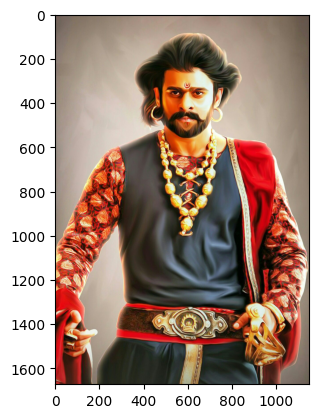

In [115]:
plt.imshow(Poster[:,:,::-1])
plt.show()

In [18]:
Poster_faces = app.get(Poster)

assert len(Poster_faces) ==4


In [70]:
ram = cv2.imread('ramcharan.jpg')

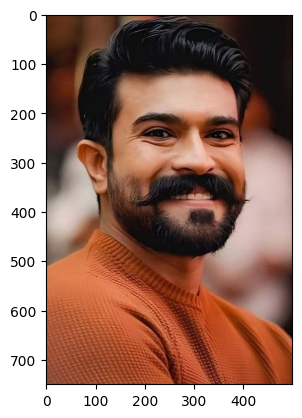

In [71]:
plt.imshow(ram[:,:,::-1])
plt.show()

In [49]:
ram_faces = app.get(ram)

assert len(ram_faces) ==1

C:\Users\aksha\miniconda3\envs\insight\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


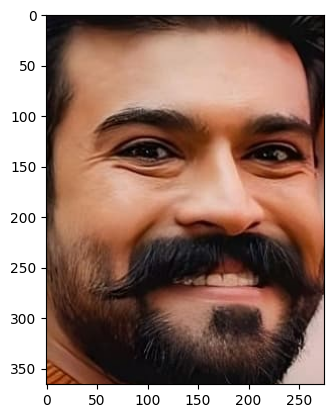

In [51]:
ram_face = ram_faces[0]
bbox = ram_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(ram[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [55]:
faces = app.get(Poster)

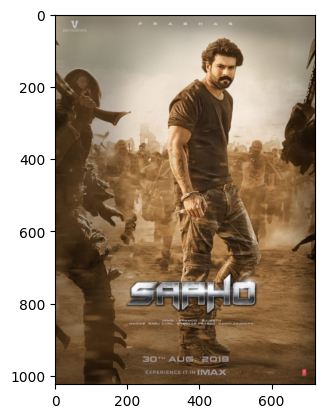

In [59]:
res = img.copy()
for face in faces :
    Poster = swapper.get(Poster, face, ram_face , paste_back = True )
plt.imshow(Poster[:,:,::-1])
plt.show()    

In [96]:
ram = cv2.imread('akshay.jpeg')

In [97]:
import time
st= time.time()
ram_faces = app.get(ram)

assert len(ram_faces) ==1

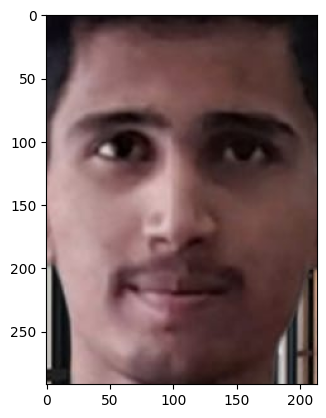

In [98]:
ram_face = ram_faces[0]
bbox = ram_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(ram[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [99]:
faces = app.get(Poster)

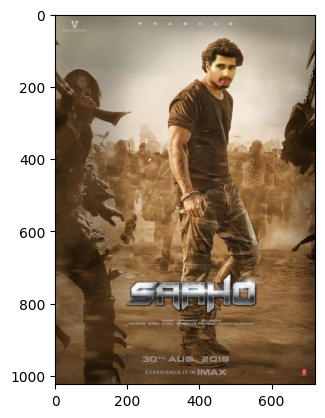

Execution time= 7.402908086776733


In [100]:
res = img.copy()
for face in faces :
    Poster = swapper.get(Poster, face, ram_face , paste_back = True )
plt.imshow(Poster[:,:,::-1])
plt.show()  
et=time.time()
print("Execution time=", et-st)

In [116]:
ram = cv2.imread('durgesh.jpeg')

In [117]:
import time
st= time.time()
ram_faces = app.get(ram)

assert len(ram_faces) ==1

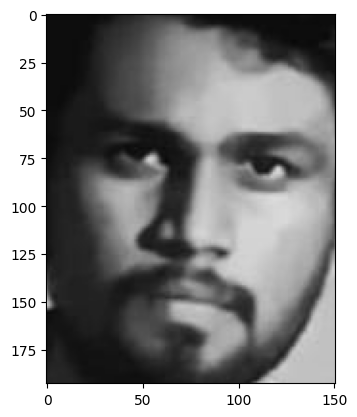

In [118]:
ram_face = ram_faces[0]
bbox = ram_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(ram[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [119]:
faces = app.get(Poster)

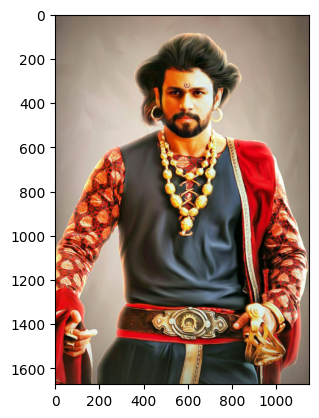

Execution time= 4.838606834411621


In [120]:
res = img.copy()
for face in faces :
    Poster = swapper.get(Poster, face, ram_face , paste_back = True )
plt.imshow(Poster[:,:,::-1])
plt.show()  
et=time.time()
print("Execution time=", et-st)